## Проект по информатике (Набережная Елизавета, Обухова Анастасия, Гуменная Яна)

#  1. Kiva и ее деятельность
***


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva - это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva - **Make a loan, change a life**

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назанчений и стран, нуждающихся в финансировании можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с Сельским хозяйством, Питанием, Здоровьем и гигиеной, Розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала более 1 миллиарда долларов для 2 миллионов заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн. небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% - доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva - женщины
* Кредит Kiva финансируется каждые 2 минуты



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задачи
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь, конечно же, их интересуют не статистические показатели, а ощутимые выводы и рекомендации, которые позволят им работать эффективнее и больше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

#### Составим алгоритм данного исследования:
- Проверим, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям.
- Ознакомимся с датасетом, изучим его базовые характеристики, выявим первоначальные зависимости.
- Изучим основные демографические характеристики людей, которые используют Kiva. Поймем, из каких они регионов и стран, какова гендерная характеристика заемщиков.
- Посмотрим, для каких целей людям нужны средства и какие суммы они просят. Изучим сектора экономики, виды деятельности и сделаем выводы о том, как обстоят дела в каждом из них.
- Проанализируем, как долго заемщикам приходится ждать полного финансирования заявки.
- Попробуем изучить природу зависимости времени, требуемого на погашение ссуды и суммы кредита.
- Сформулируем основные выводы и визуальные материалы, подкрепляющие их.


## 1.4. Базы данных компании Kiva
***

**kiva_loans** - это набор данных, который содержит большую часть информации о займах:
- id - Уникальный идентификатор для кредита
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом заемщику (USD)
- sector - Сектор использования займа
- activity - Более гранулированная категория
- use - Назначение использования суммы кредита
- country_code - ISO код страны страны, в которой был выдан заем
- country - Полное название страны, в которой был выдан кредит
- posted_time - Время, в которое заявка была опубликована на Kiva
- disbursed_time - Время, когда кредитный агент выдал заемщику сумму
- funded_time - Время, когда заявка полностью финансируется кредиторами
- term_in_months - Срок, на который был выдан кредит в месяцах
- lender_count - Общее количество кредиторов, которые внесли свой вклад в этот кредит
- loaner_genders - Разделенные запятыми буквы M, F, где каждый экземпляр представляет одного мужчину / женщину в группе

**kiva_mpi_region_locations** - набор данных, содержащий данные о регинах и показатели MPI:
(Global Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше бедность в соответствующем регионе 
- country - страна
- region - регион в стране
- world_region - часть света
- MPI - многомерный индекс бедности
- geo - координаты (широта, долгота)



# 2. Разведочный анализ данных
***

## 2.1. Импорт данных и первое знакомство с датасетом
***
Датасеты:
*  df_mpi
*  df_kiva_loans 


Импортируем необходимые библиотеки и загрузим предоставленные наборы данных:

In [3]:
# Импорт библиотек

import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

import warnings
warnings.filterwarnings("ignore")  

In [5]:
df_kiva_loans = pd.read_csv("/content/kiva_loans.csv", parse_dates=['posted_time', 'disbursed_time', 'funded_time'])
df_mpi = pd.read_csv("/content/kiva_mpi_region_locations.csv")

Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных:

In [6]:
df_mpi.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [7]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16.0,NaN,female,monthly,2014-01-01


Посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе:

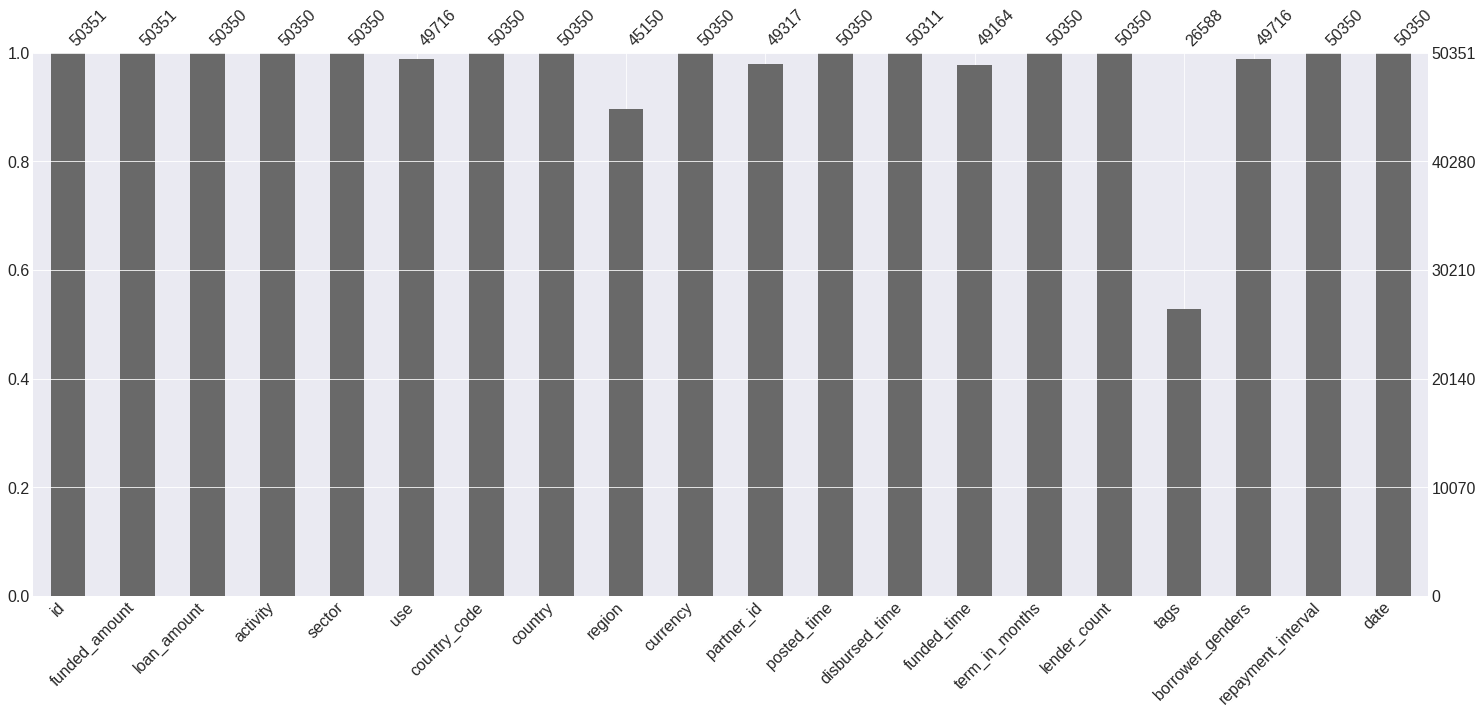

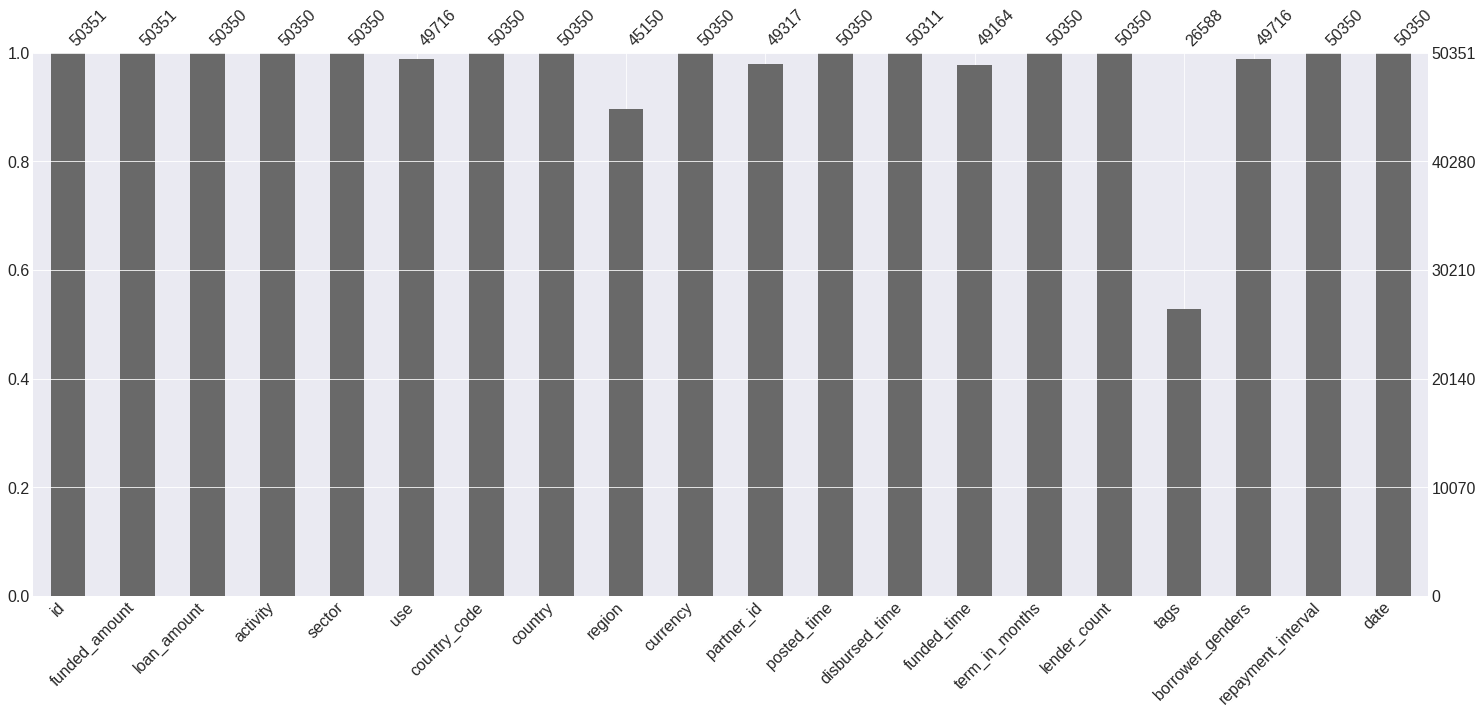

In [9]:
msno.bar(df_kiva_loans)

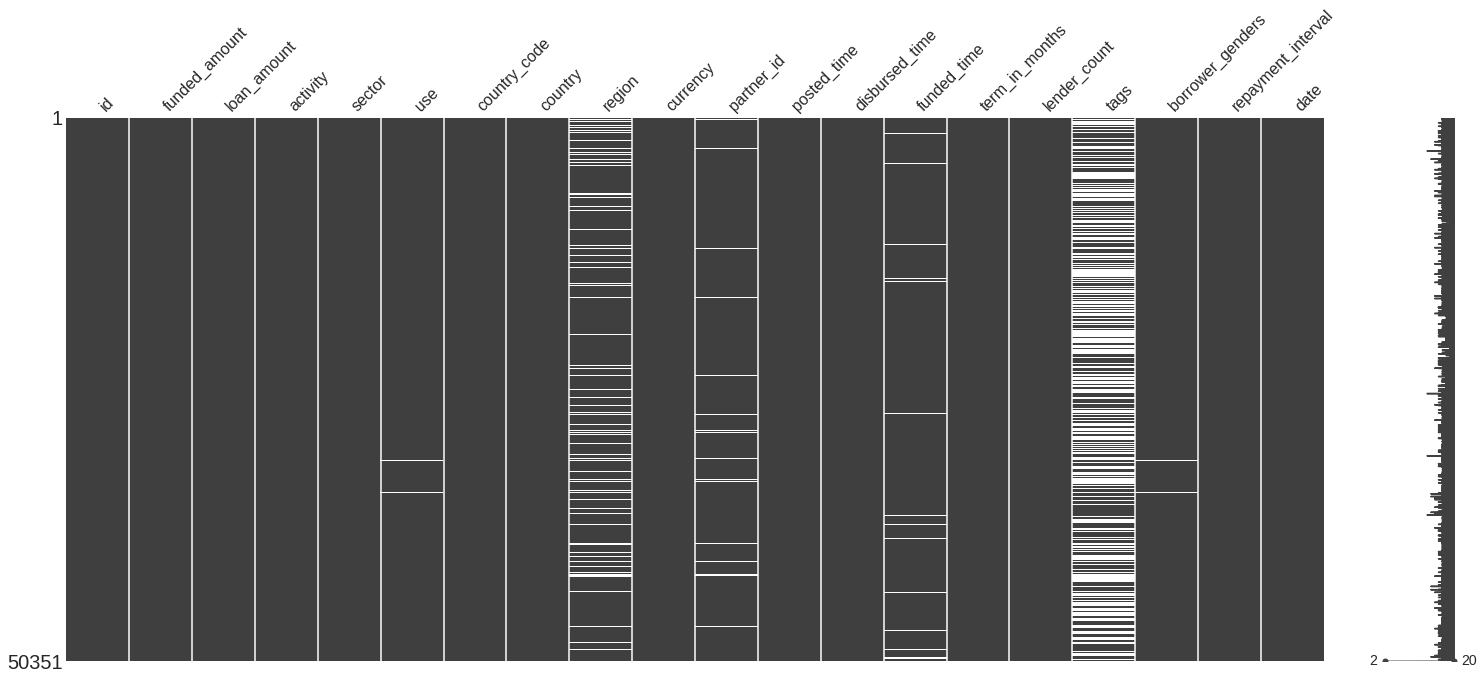

In [10]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе Kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [11]:
df_kiva_loans.dtypes

id                                  int64
funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
partner_id                        float64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                      float64
tags                               object
borrower_genders                   object
repayment_interval                 object
date                               object
dtype: object

In [12]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,5.035100e+04,50351.000000,50350.000000,49317.000000,50350.000000,50350.000000
mean,6.862342e+05,882.941650,904.819265,155.833932,14.220715,26.238352
std,5.882711e+04,1109.902014,1137.768455,64.841277,9.257433,32.001239
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,6.657865e+05,300.000000,300.000000,119.000000,8.000000,9.000000
50%,6.785190e+05,525.000000,525.000000,145.000000,13.000000,17.000000
75%,6.911715e+05,1025.000000,1050.000000,188.000000,14.000000,32.000000
max,1.081183e+06,50000.000000,50000.000000,370.000000,148.000000,1491.000000


In [13]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,tags,borrower_genders,repayment_interval,date
count,50350,50350,49716,50350,50350,45150,50350,26588,49716,50350,50350
unique,154,15,39193,69,69,3442,53,7669,866,4,115
top,General Store,Agriculture,to purchase more groceries to sell.,PH,Philippines,Lahore,PHP,user_favorite,female,monthly,2014-02-18
freq,4556,11776,159,10108,10108,994,10108,3761,32390,26393,898


**Первые очевидные результаты и выводы, которые можно сделать:**
* В этом датасете содержатся данные о **87** странах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **Сельское хозяйство**.
* Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита.
* В этом наборе данных **11298** разных значений пола! Очевидно, это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование - **450** долларов. Возможно это означает, что есть небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что еще более важно: есть только **1298** различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдается более **500** займов. Это дает нам четкое представление о том, насколько важна эта платформа и какое влияние она оказывает.


# 2.2. Пользователи Kiva

### 2.2.1. Из каких стран эти люди? 
Из исходного файла
***

Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva.


In [14]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [15]:
countries

Philippines                             10108
Kenya                                    5537
El Salvador                              3655
Pakistan                                 2458
Peru                                     2170
Cambodia                                 1823
Uganda                                   1766
Nicaragua                                1661
Tajikistan                               1562
Colombia                                 1451
Liberia                                  1219
Sierra Leone                              993
Ecuador                                   964
India                                     902
Paraguay                                  898
Mali                                      879
Honduras                                  835
Bolivia                                   731
Vietnam                                   728
Armenia                                   719
Palestine                                 650
Kyrgyzstan                        

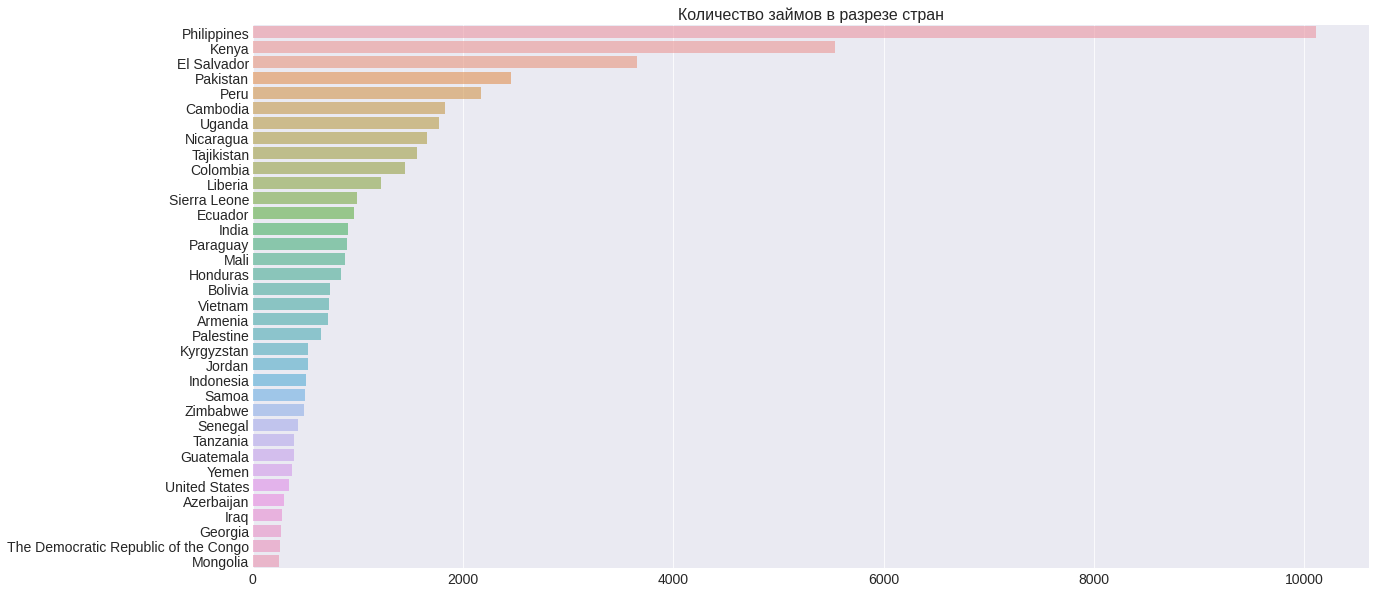

In [16]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов?**

Чуть менее четверти всех займов приходится на Филиппины.

Скорее всего, это связано с тем, что там широко распространены краткосрочные и небольшие займы.
Запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия может оказаться наиболее эффективной для точечного и обширного финансирования в условиях бедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Нет ни одной страны Европейского Союза. Удивительным стало присутствие США в этом списке, поскольку уровень бедности в США не такой, как в других странах. 

Попробуем сгруппировать страны по частям света

Для этого воспользуемся файлом **kiva_mpi_region_locations**

In [17]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [18]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [19]:
df_kiva_loans_world_region = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [20]:
regions = df_kiva_loans_world_region['world_region'].value_counts()

In [21]:
regions_list = regions.index.to_list()

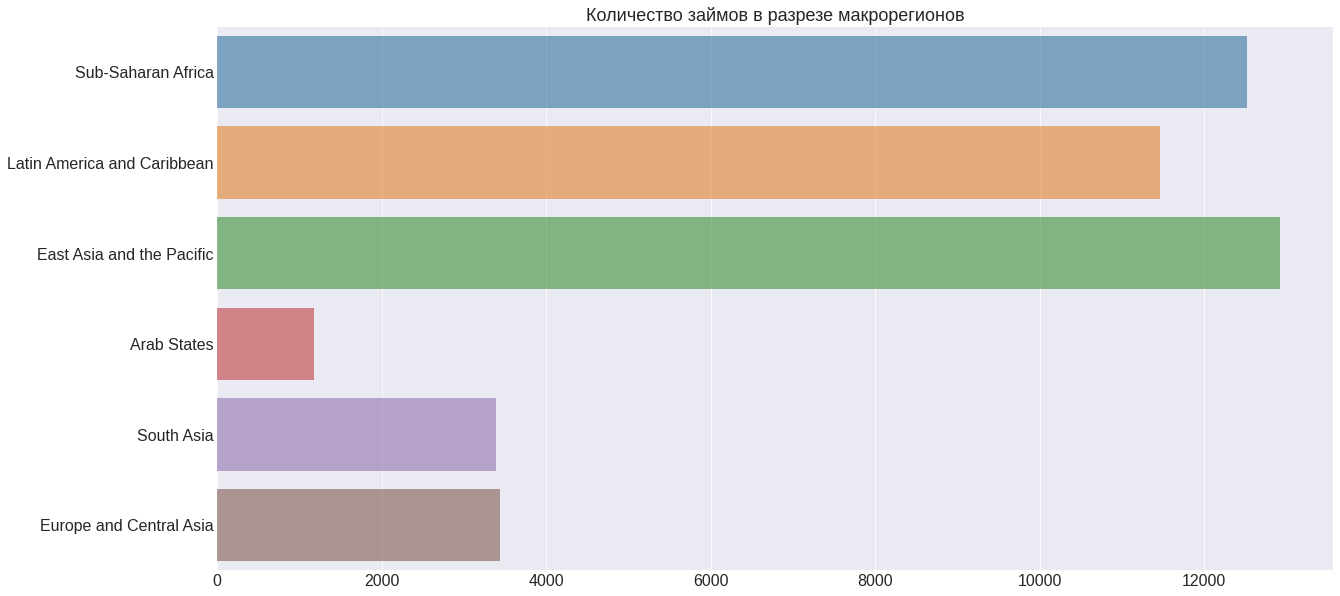

In [22]:
regions_mpi = df_mpi['world_region'].value_counts()
list_regions = list(regions_mpi.index)

plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, order = list_regions,  alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

Очевидным становится наличие 3-х лидеров и 3-х отстающих по количеству выданных займов

Исходя из этого, можно предположить, что в 3 регионах-отстающих либо нет острой потребности в присутствии Kiva (относительно богатые регионы), либо платфоома Kiva пока не набрала те обороты, что мы видим в 3 регионах-лидерах. Присутствие региона "Арабские страны" свидетельствует в пользу первого предположения.

### 2.2.2. Люди какого пола обращаются за финансированием?
***

In [23]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                                                                32390
male                                                                                                                                                                                                                                                                                                  10799
female, female                                                                                                                                                                                                                                                                                          825
female, female, female, female                                                                      

Во многих займах, заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Давайте использовать метку **group** для этих заемщиков на круговой диаграмме.

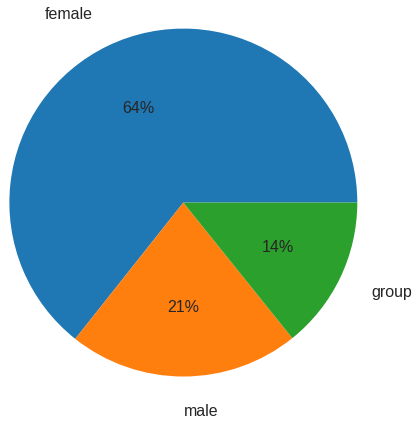

In [24]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заемщиков - женщины, это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

**В каких странах подавляющее большинство заемщиков - женщины?**

In [25]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

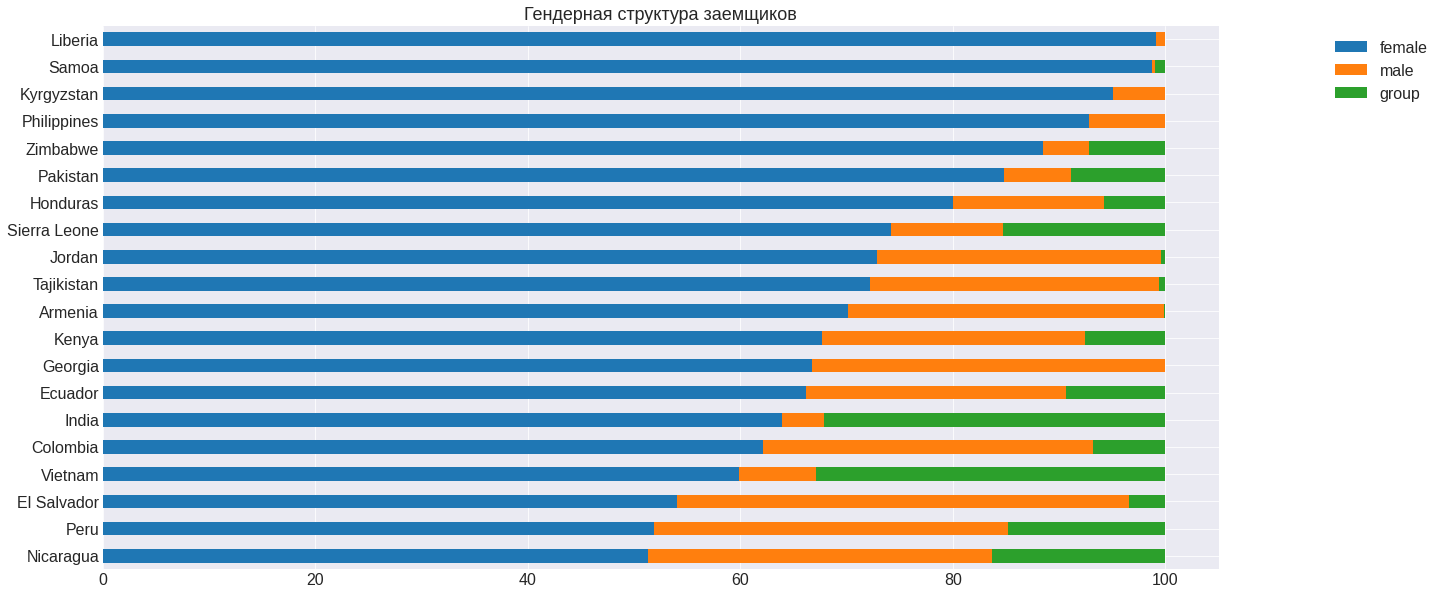

In [26]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре заемщиков в разрезе стран?**

Например, в связи с направлениями традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран с преобладающей религией Ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 
Kiva позволяет получать бОльшие возможности и перспективы в тех регионах, где ранее это было вряд ли доступно.

**В каких странах подавляющее большинство заемщиков - мужчины?**

In [27]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

df_male = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])

   
df_male = df_male[['male', 'female', 'group']]
df_male = df_male[(df_male['male'] >= df_male['female']) & (df_male['male'] >= df_male['group'])]
df_male

borrower_genders,male,female,group
country,,,
United States,44.797688,43.063584,12.138728
Uganda,46.489241,43.091733,10.419026
Indonesia,48.228346,35.629921,16.141732
Iraq,49.450549,28.571429,21.978022
Mongolia,53.174603,46.031746,0.793651
Palestine,71.692308,27.846154,0.461538
Azerbaijan,73.898305,26.101695,0.000000


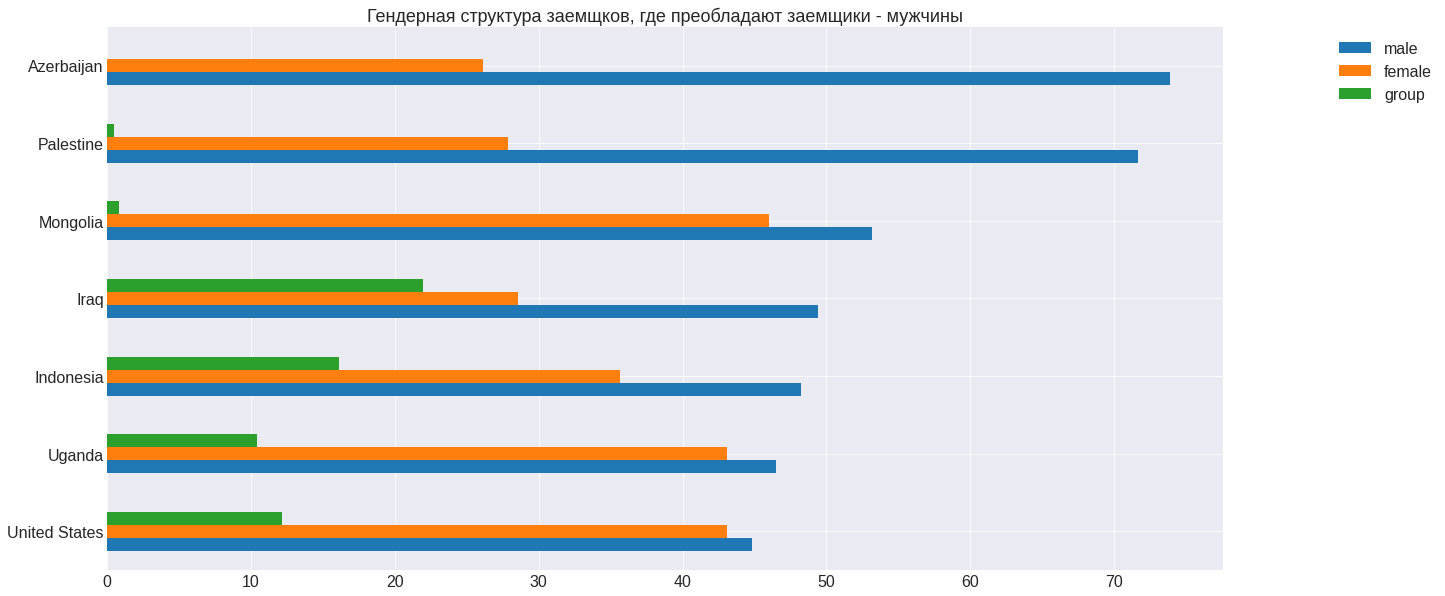

In [28]:
plot = df_male.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , title='Гендерная структура заемщков, где преобладают заемщики - мужчины'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

  **С чем может быть связана преобладающая доля мужчин в некоторых странах?**

Так как всего представлено 87 стран, 4 страны, с большинством заемщиков мужчин скорее исключениее, чем какая-то закономерность. 

Стоит так же отметить, что весомое преимущество заемщиков мужчин только в 2-х странах: **Нигерии** и **Палестине**.

Такое распределение может быть связано с сильным ущемеление женских прав, в частности решение мужчин о том, что женщина - "хранительница очага".

**В каких странах подавляющее большинство заемщиков - группы?**

In [29]:
df_group = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group', 'female'])

   
df_group = df_group[[ 'group', 'female', 'male']]
df_group = df_group[(df_group['group'] >= df_group['female']) & (df_group['group'] >= df_group['male'])]
df_group

borrower_genders,group,female,male
country,,,
Cambodia,48.107515,44.377400,7.515085
Senegal,50.351288,22.248244,27.400468
Paraguay,57.683742,24.387528,17.928731
Guatemala,67.430025,14.503817,18.066158
Yemen,67.750678,4.336043,27.913279
Mali,83.162685,7.963595,8.873720
The Democratic Republic of the Congo,86.311787,3.041825,10.646388
Tanzania,97.969543,1.015228,1.015228


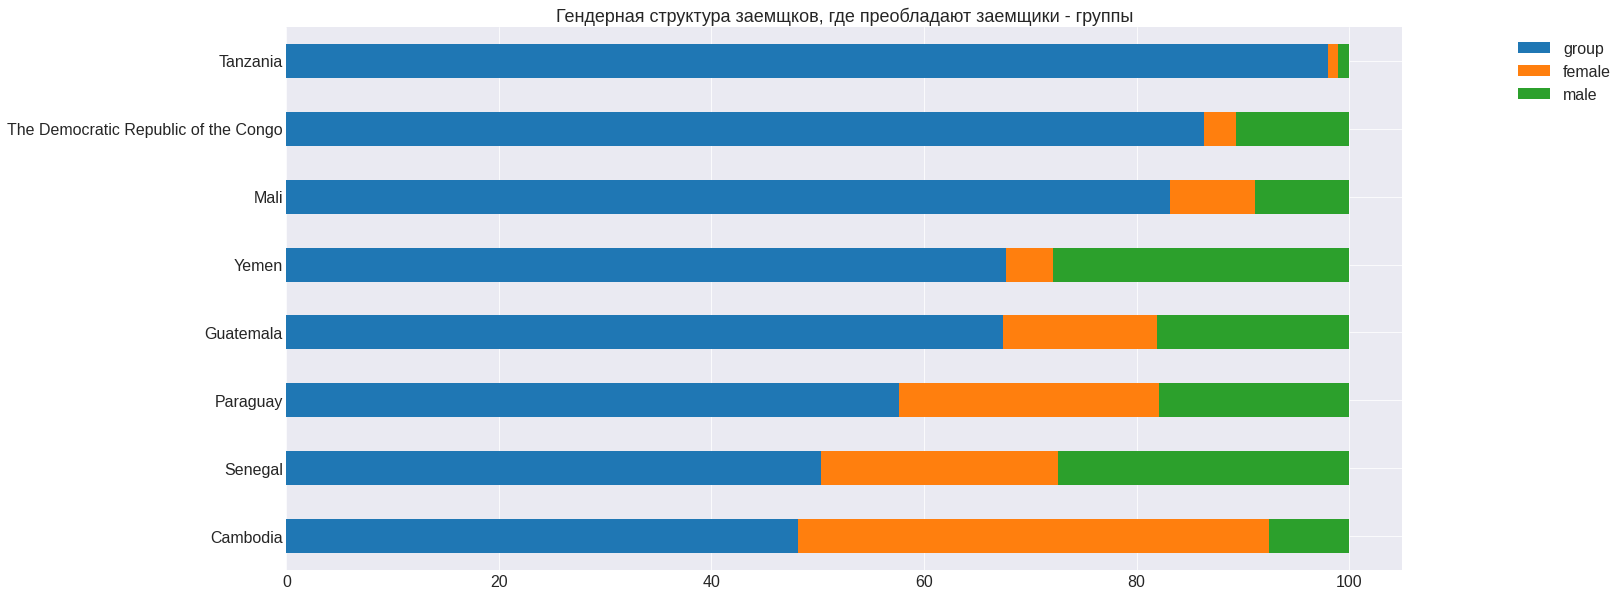

In [30]:
plot = df_group.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщков, где преобладают заемщики - группы'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [31]:
#посмотрим где находятся страны, чтобы лучше понять закономерности
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

    
df_group_merged = df_group.merge(df_mpi_grouped, on='country', how='left')
df_group_merged

,country,group,female,male,ISO,world_region,MPI
0,Cambodia,48.107515,44.377400,7.515085,KHM,East Asia and the Pacific,0.164053
1,Senegal,50.351288,22.248244,27.400468,SEN,Sub-Saharan Africa,0.350750
2,Paraguay,57.683742,24.387528,17.928731,NaN,NaN,NaN
3,Guatemala,67.430025,14.503817,18.066158,GTM,Latin America and Caribbean,0.113957
4,Yemen,67.750678,4.336043,27.913279,YEM,Arab States,0.225952
5,Mali,83.162685,7.963595,8.873720,MLI,Sub-Saharan Africa,0.444833
6,The Democratic Republic of the Congo,86.311787,3.041825,10.646388,NaN,NaN,NaN
7,Tanzania,97.969543,1.015228,1.015228,NaN,NaN,NaN


  **С чем может быть связана преобладающая доля групп в некоторых странах?**

7 стран из 87 не дают нам понять общий тренд, а лишь выстроить план работы в данных странах.

Данные страны находятся рядом с экватором, возможно данные погодные условия, уровень жизни, уровень образованности влияют на умение кооперироваться или делают невозможным работу в одиночку.

### 2.2.3. Анализ зависимости пола заемщика от сектора экономики


In [32]:
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)
list_sectors

['Agriculture',
 'Arts',
 'Clothing',
 'Construction',
 'Education',
 'Entertainment',
 'Food',
 'Health',
 'Housing',
 'Manufacturing',
 'Personal Use',
 'Retail',
 'Services',
 'Transportation',
 'Wholesale']

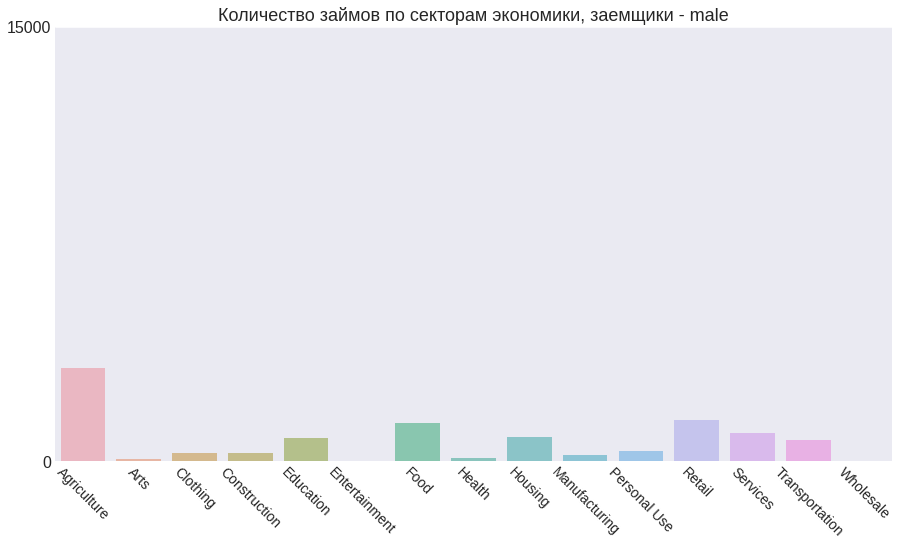

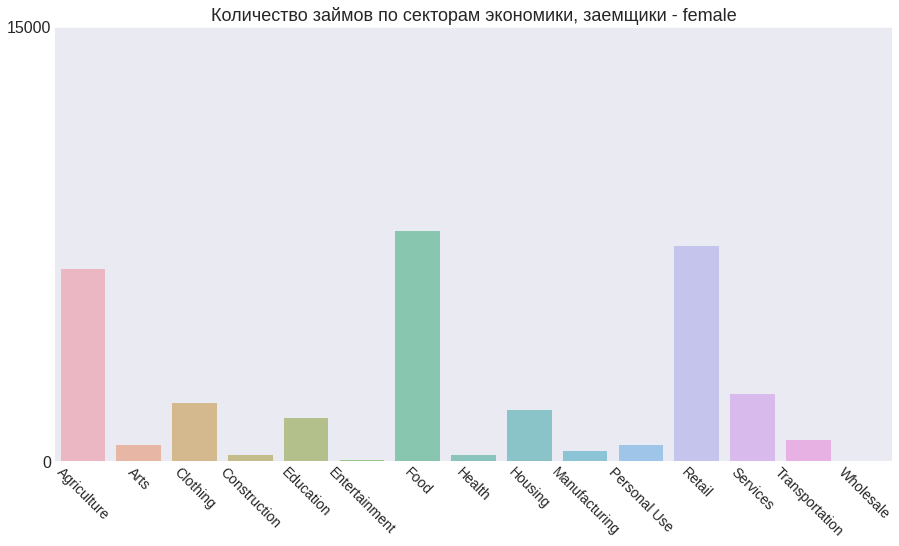

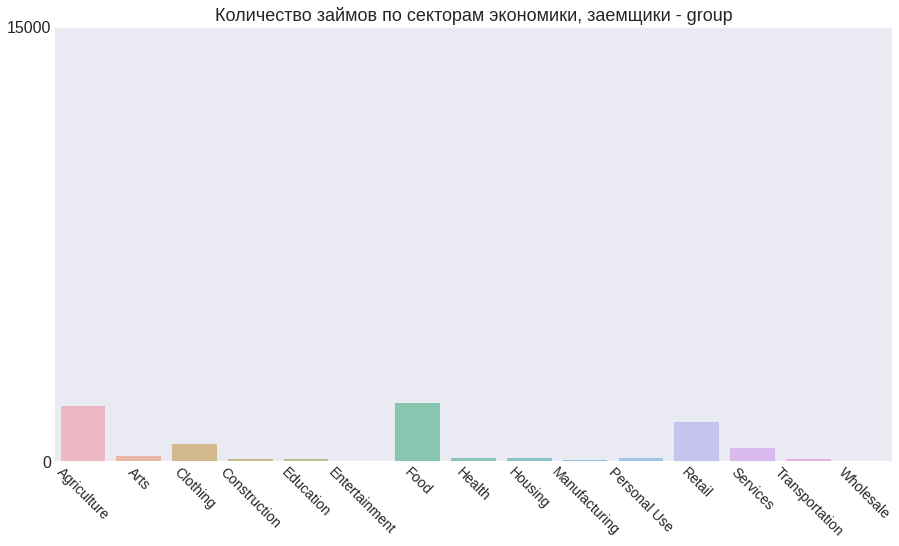

In [33]:
genders = ['male', 'female', 'group']
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)

data_female = df_kiva_loans[df_kiva_loans['borrower_genders'] == 'female']['sector'].value_counts()

for i, gender in enumerate(genders):
    
    plt.figure(figsize=(15,8))
    data = df_kiva_loans[df_kiva_loans['borrower_genders'] == gender]['sector'].value_counts()
    
        
    sns.barplot(x = data.index, y = data.values, order = list_sectors,  alpha=0.6)

    plt.title("Количество займов по секторам экономики, заемщики - " + str(gender), fontsize=18)
    plt.tick_params(axis = 'y', labelsize = 16)
    plt.tick_params(axis = 'x', rotation = - 45, labelsize = 14 )
    plt.yticks(list(range(0, data_female.max() + 10000, 15000)) )
    plt.show();


**Основные выводы: зависимость пола заемщика от сектора экономики**

**Заемщики - мужчины**

1. Их больше всего занимает область сельского хозяйства, которая является фаворитом с огромным отрывом. Это может быть связано со спецификой работы или они выбрали наиболее понятную область, через которую можно обеспечить свою семью необходимым.

2. Три выделяющихся сектора экономики - Ритейл, Еда, Образование
Два первых сектора в целом являются наиболее популярными. Наличие среднего количества заявок в секторе образование должно быть связано с кредитами на образовнаие свое или детей.


**Заемщики - женщины**

1. Сельское хозяйство, еда, ритейл - лидеры.

2. Заявок в секторах экономики Одежда и Искусство больше у девушек. Связано с тем, что темы являются более близкими для женщин.


**Заемщики - группы**

1. Лидеры - сельское хозяйство, еда и займы для персонального использования.

2. Количество займов для персонального использования много именно у групп, должно быть это связано с тем, что займы берут муж и жена, например, или родители и дети, соседи, для того, чтобы обеспечить свою семью чистой водой или санитарным туалетом. 

# 2.3 Количество займов

1. Определим количество займов в разрезе секторов экономики.
2. Определим количество займов в разрезе видов деятельности.
3. Составим рейтинг из целевых назначений для займа.
4. Проанализируем наиболее популярные виды деятельности по каждому сектору
экономики
(сгруппируем займы по sector, activity, отобразим группы на отдельных графиках).
5. Исследуем влияние такого атрибута-займа, как «Количество кредиторов (lender_count) на
суммы и сроки займов».

# 2.3.1 Количество займов в разрезе секторов экономики

Количество займов в разрезе секторов экономики:


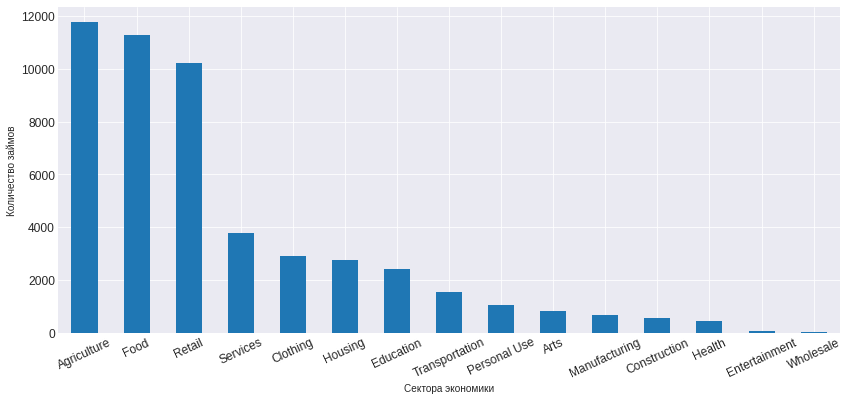

In [34]:
# Группировка данных по секторам с подсчетом записей
group_by_sector = df_kiva_loans.groupby('sector').size().sort_values(ascending=False)
group_by_sector.plot(kind="bar", rot=25, fontsize=12, figsize=(14, 6), xlabel="Сектора экономики", ylabel="Количество займов")
print("Количество займов в разрезе секторов экономики:")

In [35]:
# Количество займов в разных сектарах и их процентное соотношение
print("Количество займов в разных сектарах и их процентное соотношение")
pd.DataFrame({'Количество': group_by_sector, 'Процент': group_by_sector / sum(group_by_sector) * 100})

Количество займов в разных сектарах и их процентное соотношение


,Количество,Процент
sector,,
Agriculture,11776,23.388282
Food,11303,22.448858
Retail,10227,20.311817
Services,3774,7.495531
Clothing,2893,5.745780
Housing,2770,5.501490
Education,2408,4.782522
Transportation,1529,3.036743
Personal Use,1047,2.079444


**Основные выводы**: количество займов в разрезе экономики

1. Как мы видим, большая часть займов 
приходится на агрокультуру - 27%, чуть меньше на еду - 20% и 18% на розничную торговлю. Данные отрасли - явные лидеры по количеству займов. В данных секторах экономики очень важна закупка, как правило - это относительно небольшие суммы. Скорее всего, данные виды деятельности выбились в лидеры из-за низкого порога входа на рынок и ,соответственно, большого количества мелких продавцов.

2. Наименьшие займы приходятся на ряд отраслей (производство, оптовые продажи, здоровье, искусство), в которых частно присутствуют игроки-гиганты и необходимы узкие знания по темам. Также еще одной причиной может быть непопулярность (возможно, низкая необходимость) данных сфер в частях мира, количество займов в которых довольно много. Так в бедных странах Африки и Южной Америки необходимо прежде всего перекрыть базовые потребности в еде, воде, предметах первой необходимости и только потом заниматься, например, развлечениями.

3. Последнюю теорию доказывают сектора, которые находятся в середине рейтинга (сервис, одежда, образование, жилье).

# 2.3.2 Количество займов в разрезе видов деятельности

Наиболее популярные виды деятельности:


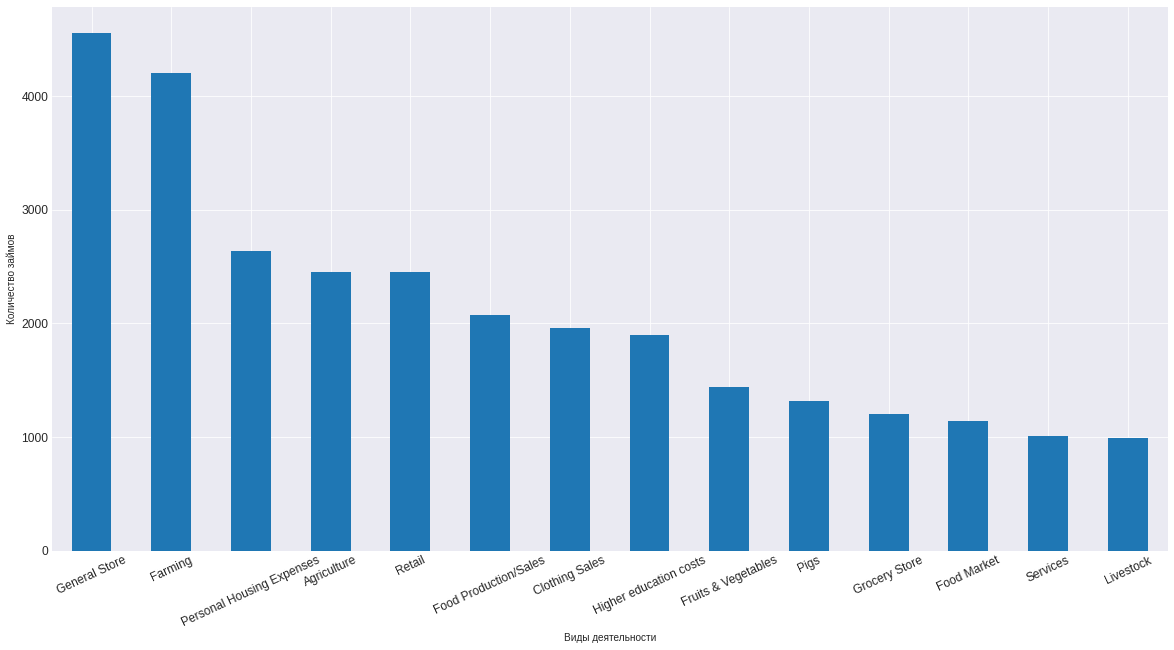

In [36]:
# Группировка данных по видам деятельности с подсчетом записей
group_by_activity = df_kiva_loans.groupby('activity').size().sort_values(ascending=False)

print("Наиболее популярные виды деятельности:")
group_by_activity[:14].plot(kind="bar", rot=25, fontsize=12, figsize=(20, 10), xlabel="Виды деятельности", ylabel="Количество займов")
plt.show()

In [37]:
# Количество займов в разных видах деятельности и их процентное соотношение
print("Количество займов в разных видах деятельности и их процентное соотношение")
pd.DataFrame({'Количество': group_by_activity, 'Процент': group_by_activity / sum(group_by_activity) * 100})

Количество займов в разных видах деятельности и их процентное соотношение


,Количество,Процент
activity,,
General Store,4556,9.048659
Farming,4206,8.353525
Personal Housing Expenses,2640,5.243297
Agriculture,2453,4.871897
Retail,2449,4.863952
...,...,...
Patchwork,2,0.003972
Cleaning Services,1,0.001986
Air Conditioning,1,0.001986


**Основные выводы** : количество займов в разрезе видов деятельности

1. По полученным данным мы увидели более детально, на что люди берут займы. График дает нам понимание, что востребовано у людей и в каких видах деятельности им нужна поддержка.

2. Два явных лидера - **Фермерство** и **Универсамы**. Так как большинство заемщиков находится в бедных странах, они пытаются закрыть высокий спрос на "самое нужное". Также вероятно, что фермерство является абсолютным лидером из-за моды на здоровое питание в развитых странах.

3. Дальнейшие виды деятельности - это то, с чем человек сталкивается в развивающейся/развитой стране довольно частно.

4. Интересно, что люди занимаются свиноводством, хотя казалось, что большое количество заемщиков исповедуют Ислам, должно быть это связано с тем, что огромное количество людей любят бекон.

# 2.3.3 Составьте рейтинг из целевых назначений для займа.

In [38]:
# Группировка данных по видам деятельности с подсчетом записей
group_by_use = df_kiva_loans.groupby('use').size().sort_values(ascending=False)

print("Наиболее популярные назначения займа (топ-20):")
for i in group_by_use[:20].items():
  print(f'{i[0]}: {i[1]} человек')

Наиболее популярные назначения займа (топ-20):
to purchase more groceries to sell.: 159 человек
to purchase building materials and pay for construction labor: 158 человек
to buy feed and vitamins for her pigs: 117 человек
to buy feed and vitamins for her pigs.: 103 человек
To process more mobile phone credit sales on the weekends: 94 человек
to buy supplies.: 80 человек
to buy beehives and apiary materials for honey production.: 73 человек
to buy ingredients for her food production business: 71 человек
to buy cows.: 67 человек
to purchase building materials and pay for construction labor.: 62 человек
to buy cows: 59 человек
to buy fertilizers and other farm supplies.: 58 человек
to buy feeds and vitamins for her pigs.: 54 человек
to purchase poultry.: 53 человек
to buy a cow.: 51 человек
To purchase a mobile phone, solar charging set and a weighing scale: 51 человек
to stock her store.: 49 человек
to purchase a dairy cow.: 48 человек
to purchase one more cow.: 47 человек
to buy additio

1. Наиболее популярная причина для взятия займа - покупка фильтра для обеспечения питьевой водой. Это говорит о том, что больше всего программа популярна в бедных странах, среди людей, которые не живут, а пытаются выжить. Kiva - должно быть их единственная опора, возможность сделать жизнь лучше.
Этот факт показывает, что Kiva в первую очередь про идею, а не про деньги.

2. Интересно, что люди охотнее выбирают заемщиков в сферах, которые закрывают нужды, а не занимаются предпринимательством. Это значит, что более богатые люди действительно озабочены уровнем жизни остальных и готовы его повышать.

3. Также людей заботит экология:
* to buy a solar lantern : 881 человек
* to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation : 866 человек.

# 2.3.4. Влияние такого атрибута займа, как «Количество кредиторов (lender_count) на суммы и сроки займов».

In [39]:
dependence_lender_count = df_kiva_loans[['lender_count', 'funded_amount', 'term_in_months']].sort_values(by='lender_count')

# Сргуппируем данные по количеству кредиторов со взятием среднего значения
dependence_lender_count = dependence_lender_count.groupby('lender_count').mean()

dependence_lender_count

,funded_amount,term_in_months
lender_count,,
0.0,0.000000,22.266667
1.0,484.133034,10.284006
2.0,616.972387,10.128205
3.0,437.212682,10.689564
4.0,277.492683,10.907317
...,...,...
623.0,20000.000000,26.000000
686.0,20000.000000,26.000000
821.0,25000.000000,7.000000


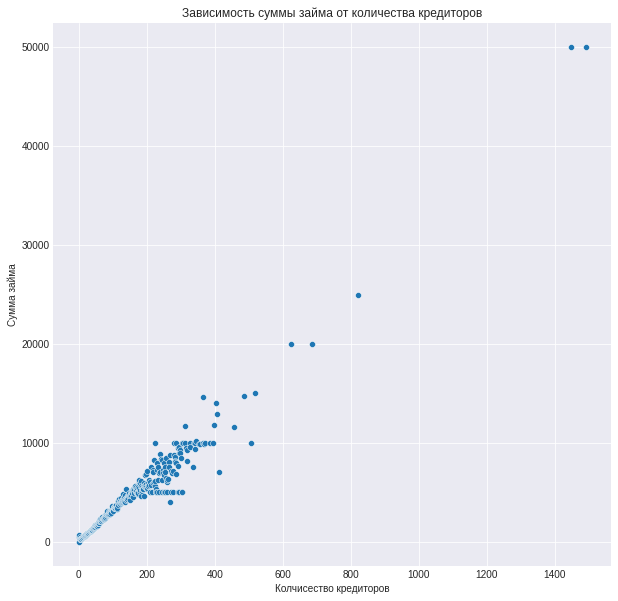

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=dependence_lender_count, x='lender_count', y='funded_amount', ax=ax, alpha=1)
ax.set_title('Зависимость суммы займа от количества кредиторов')
ax.set_xlabel('Колчисество кредиторов')
ax.set_ylabel('Сумма займа')

plt.show()

**Зависимость суммы займа от количества кредиторов**

1. Чем больше количество кредиторов, тем больше сумма займа. Это значит, что зачастую на один большой кредит деньги дает несколько кредиторов. Много людей готовы давать взаймы, но делают это небольшими суммами (примерно 500 долларов).

2. Непонятно с чем связаны такие скачки в точках при количестве кредиторов от ~600 до ~1300.

3. Прослеживается ряд точек в значениях суммы займа ~5000. Причины неизвестны.

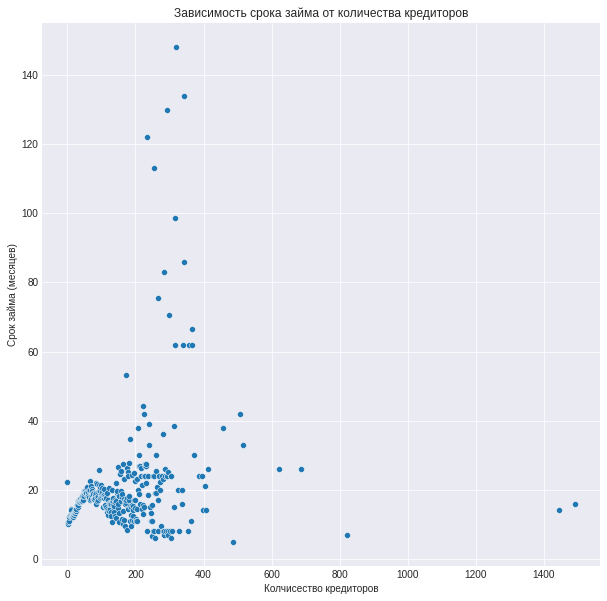

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=dependence_lender_count, x='lender_count', y='term_in_months', ax=ax, alpha=1)
ax.set_title('Зависимость срока займа от количества кредиторов')
ax.set_xlabel('Колчисество кредиторов')
ax.set_ylabel('Срок займа (месяцев)')

plt.show()

**Зависимость срока займа от количества кредиторов**

1. Количество кредиторов не влияет на срок займа.

2. Видно, что есть около 400 кредиторов, которые готовы выдавать займы на любой срок в интервале от 0 до 120.

# 2.4 Объем финансирования
* Проанализируем распределение сумм займа (какие суммы чаще выдают).
* Изучим несколько займов с очень большими суммами.
* Определим суммы займа в разрезе секторов. 

## 2.4.1 Анализ распределение сумм займа

In [42]:
loan_count_sorted = df_kiva_loans.groupby('funded_amount')['funded_amount'].count().sort_values(ascending=False)
loan_count_sorted.head(15)

funded_amount
250.0     2993
225.0     2432
125.0     1948
350.0     1936
500.0     1769
600.0     1570
400.0     1560
200.0     1532
1000.0    1426
300.0     1411
375.0     1316
450.0     1286
275.0     1222
425.0     1217
475.0     1043
Name: funded_amount, dtype: int64

1) Большая часть займов приходится на суммы ниже 500$, т.е. большей популярностью пользуются так называемые микрозаймы у компании Kiva. Должно быть, это связано с тем, что основные цели для кредита - это деньги на фильтр для воды и туалет.

2) Большие суммы не так популярны, скорее всего, именно из-за специфики проекта, он все-таки больше гуманитарный.

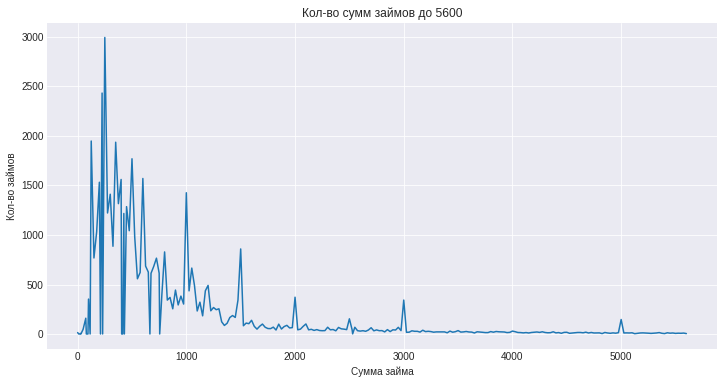

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

df_loan_amount_count = df_kiva_loans[df_kiva_loans['funded_amount'] <= 5600].groupby('funded_amount')['funded_amount'].count()
#ax.plot(df_loan_amount_count)

df_loan_amount_count

sns.lineplot(data=df_loan_amount_count, ax=ax)
ax.set_title('Кол-во сумм займов до 5600')
ax.set_xlabel('Сумма займа')
ax.set_ylabel('Кол-во займов')

plt.show()

На этом графике был взят промежуток от 0 до 5600, так как было выявлено, что 99% займов, приходится на суммы ниже 5600. Здесь, также, видно, что, по большей части, люди склонны брать займы ниже 1000, либо на круглые суммы по типу  1000, 1500 и тп.

## 2.4.2 Изучим несколько займов с очень большими суммами

In [44]:
loan_count_sorted = df_kiva_loans.sort_values(['funded_amount'], ascending=False)\
        [['funded_amount', 'use', 'country', 'borrower_genders']]
loan_count_sorted.head(30)

,funded_amount,use,country,borrower_genders
43182,50000.0,To buy and sell Barefoot Power's solar lightin...,Kenya,male
34196,50000.0,to buy and sell Barefoot Power's Solar Lightin...,Peru,male
38725,25000.0,To supply construction materials for a vocatio...,Rwanda,male
42697,20000.0,to expand her salon’s space and services to in...,Iraq,female
36570,20000.0,to purchase a vehicle to distribute her local ...,Iraq,female
48669,20000.0,to buy a driving school training car,Iraq,female
38757,15000.0,to replace diesel power generators with solar ...,Mauritania,male
38353,14725.0,To purchase 5 hectares of land so that they ca...,Rwanda,male
44967,13975.0,to purchase a dump truck,Yemen,male
8536,12925.0,to buy and sell Barefoot Power's solar products,India,male


Проанализируем несколько самых больших займов по таким критериям как цель(use), страна(country) и пол(borrower_genders):

1) Видно, что большинство людей берет займ для расширения бизнеса, рабочих мест и тп, большая часть относится к сектору Agriculture.

2) Страны, в которых берутся самые большие займы, как правило относятся к таким регионам как Африка, Южная Америка.

  Это связано с большой распространненостью Kiva и отсутвием других возможностей получить помощь. Например, в Северной Америке или Европе можно предложить свою идею людям с большими деньгами (таких там явно намного больше, чем в бедных странах) или воспользоваться венчурными фондами.

3) Пол, как видно из выборки, напрямую не коррелирует с величиной займа.

  Даже несмотря на то, что самый большой займ (и единственный) взяла девушка, это скорее случайность, а не закономерность. Для большой точности требуются дополнительные исследования, поэтому попробуем просуммировать все займы по половому признаку.


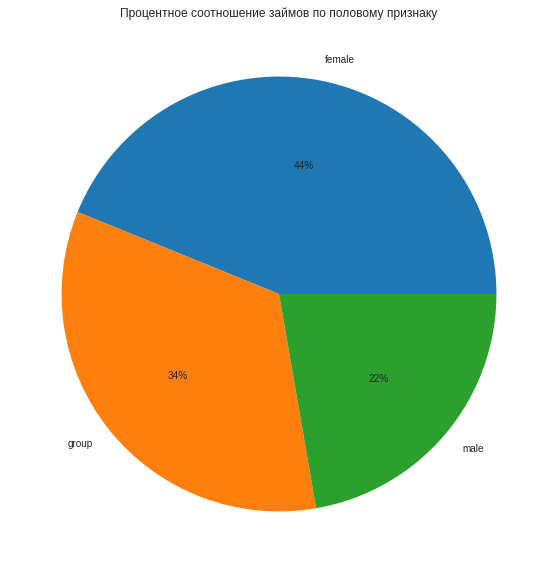

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]
df_gender_sum = df_kiva_loans.groupby('borrower_genders')[['funded_amount']].sum()

plt.pie(df_gender_sum['funded_amount'], labels=df_gender_sum.index, autopct='%1.0f%%')
plt.title('Процентное соотношение займов по половому признаку')

plt.show()

Взяв большую выборку, мы видим, что практически половина всех займов приходится на девушек. Более того, на мужчин приходится всего 20% от всех займов. Однако, ссылаясь на пункт 2.2.2, где было просуммировано кол-во всех займов по половому признаку, мы можем увидеть, что 64% кол-ва всех займов приходится на девушек, однако общая сумма всего 45%. У мужчин же 20% и там, и там. Тем самым можно сделать вывод, что девушки по большей части берут займы на небольшие суммы, несмотря на то, что самый большой займ приходится на них. А люди, состоящие в группе, наоборот, ориентируются на крупные займы.

## 2.4.3 Определите суммы займа в разрезе секторов

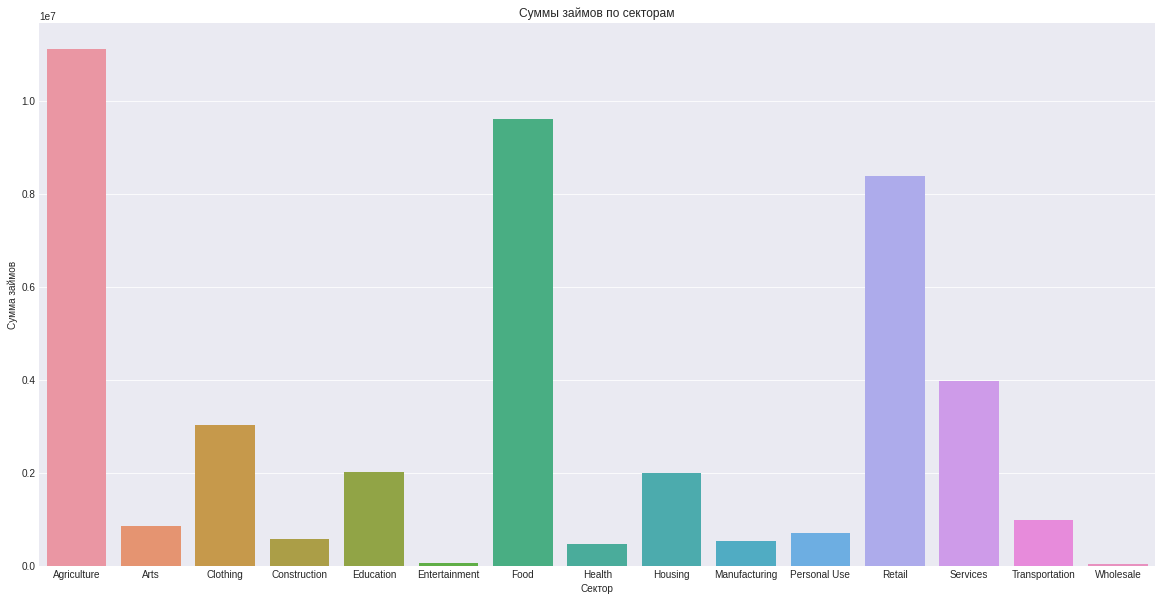

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))

df_sum_loans_by_sector = df_kiva_loans.groupby('sector')[['funded_amount', 'sector']].sum()

sns.barplot(x=df_sum_loans_by_sector.index, y=df_sum_loans_by_sector['funded_amount'], ax=ax)
ax.set_title('Суммы займов по секторам')
ax.set_xlabel('Сектор')
ax.set_ylabel('Сумма займов')

plt.show()

Больше всего средств поступает пользователям, занимающимся сельским хозяйством, пользователям, которые закупают еду, или пользователям для розничной торговли. Это связано с популярностью этих секторов у заемщиков.

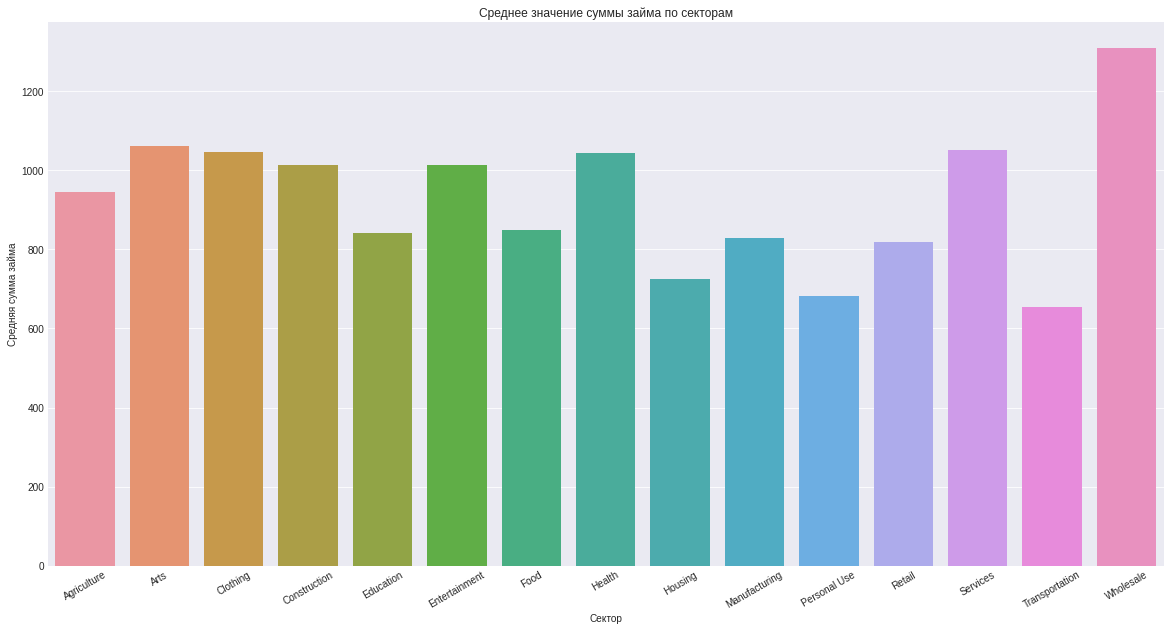

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))

df_mean_loans_by_sector = df_kiva_loans.groupby('sector')[['funded_amount', 'sector']].mean()

sns.barplot(x=df_mean_loans_by_sector.index, y=df_mean_loans_by_sector['funded_amount'], ax=ax)
plt.xticks(rotation=30)
ax.set_title('Среднее значение суммы займа по секторам')
ax.set_ylabel('Средняя сумма займа')
ax.set_xlabel('Сектор')

plt.show()

**Анализ суммы займа и средней суммы займа по секторам экономики**

1. Наиболее популярные сектора экономики (Сельское хозяйство, Еда, Розница) нуждаются лишь в кредитах на относительно маленькие суммы, но количество кредиторов в этих секторах большое.

2. Оставшиеся сектора экономики имеют совсем небольше суммы кредита, но выравниваются в диаграмме средних займов с показателями лидеров первой таблицы. Должно быть, эти сектора требуют больше вложений, но меньше людей в них заходят.

3. Хочется отдельно отметить лидеров второй таблицы - Развлечения и Оптовые продажи. Их средние суммы самые высокие, это из-за того, что данные области требуют больших вложений и финансирования. Их суммы займов говорят о том, что заемщиков в этих секторах мало, и кредиторы вкладываются лишь в тех, кто владеет действительно крутыми идеями.

## 2.4.4 Выводы по разделу

Из графиков выше можно сделать такие выводы:

1. Как правило, большие займы берут люди, состоящие в группах, девушки же, больше склонны брать микрозаймы, несмотря на то, что самый большой займ приходится на девушку.
2. Самыми популярными секторами являются Agriculture, Food, Retail.

Также возьмем во внимание таблицу из пункта 2.3.3 с целями займа и графики из пунктов 2.4.2 и 2.4.3. Из этих данных можно сделать следующие выводы:
1. Люди, берущие займы для сектора Agriculture, берут займы для поддержание своего хозяйства, расширение или увеличение рабочих мест.
2. Люди, берущие займы для сектора Food, берут займы для необходимых жизненных потребностей, более того, таких людей очень много, так как данный сектор - второй по сумме всех займов. Очень много нуждающихся в пропитании людей из стран третьего мира обращаются за помощью к Kiva. Это также видно в таблице 2.4.1 - очень много заявок на микрозаймы.

# 2.5 Время ожидания средств

* Выясним количество дней до полного финансирования заявки (в пределах какого срока обычно финансируется заявка?);
* Определим взаимосвязь времени ожидания и суммы займов (проверим взаимосвязь этих показателей);
* Взаимосвязь времени ожидания и страны;
* Взаимосвязь времени ожидания и сектора экономики;
* Время погашения кредита заёмщиком (сколько времени нужно заёмщику, чтобы погасить кредит?).

Для анализа времён финансирования нам понадобятся поля:

posted_time

funded_time

loan_amount

country

sector

days_to_full_funding – разница между funded_time и posted_time (округлим вверх)

Сохраним их и выведем сводную информацию по этим полям:

In [48]:
df_funding = df_kiva_loans.loc[:, ['posted_time', 'funded_time', 'loan_amount', 'country', 'sector', 'term_in_months']]
df_funding['days_to_full_funding'] = (df_funding['funded_time'] - df_funding['posted_time']).dt.ceil('D').dt.days

print(df_funding.describe([.25, .50, .75, .99]), end='\n\n')
print(df_funding.info())

        loan_amount  term_in_months  days_to_full_funding
count  50350.000000    50350.000000          49164.000000
mean     904.819265       14.220715             11.961232
std     1137.768455        9.257433             12.594785
min       25.000000        1.000000              1.000000
25%      300.000000        8.000000              3.000000
50%      525.000000       13.000000              7.000000
75%     1050.000000       14.000000             18.000000
99%     5450.000000       50.000000             50.000000
max    50000.000000      148.000000            421.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50351 entries, 0 to 50350
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   posted_time           50350 non-null  datetime64[ns, UTC]
 1   funded_time           49164 non-null  datetime64[ns, UTC]
 2   loan_amount           50350 non-null  float64         

Мы видим как и выше в матрице полноты данных, что колонка funded_time имеет много пропусков. Считая, что средства для таких заявок еще не были собраны на момент выгрузки данных, удалим строки без funded_time.

In [49]:
df_funding = df_funding.dropna()

df_funding.describe([.25, .50, .75, .99])

,loan_amount,term_in_months,days_to_full_funding
count,49164.000000,49164.000000,49164.000000
mean,878.909365,14.084310,11.961232
std,1112.767303,9.247526,12.594785
min,25.000000,1.000000,1.000000
25%,275.000000,8.000000,3.000000
50%,500.000000,13.000000,7.000000
75%,1000.000000,14.000000,18.000000
99%,5400.000000,50.000000,50.000000
max,50000.000000,148.000000,421.000000


В получившемся наборе данных размах числовых значений получился очень большим. Если смотреть на разбивку по перцентилям, то в 99% заявок финансируются не более 50 дней, возвращается 43 месяца, а сумма займа не превышает 5475 долларов. 

Кроме того по минимальному значению days_to_full_funding можно увидеть наличие неправильных данных: время финансирования не может быть меньше 1 дня (из-за округления вверх).

Учитывая это отбросим заявки в которых:

days_to_full_funding < 1

days_to_full_funding > 50

loan_amount > 5475

term_in_months > 43, чтобы получить более чистый набор данных:

In [50]:
df_funding = df_funding[((1 <= df_funding['days_to_full_funding']) & (df_funding['days_to_full_funding'] <= 50))]
df_funding = df_funding[df_funding['loan_amount'] <= 5475]
df_funding = df_funding[df_funding['term_in_months'] <= 43]

df_funding.describe()

,loan_amount,term_in_months,days_to_full_funding
count,47548.000000,47548.000000,47548.000000
mean,812.014701,13.394128,11.482186
std,853.435311,7.310883,11.159067
min,25.000000,1.000000,1.000000
25%,275.000000,8.000000,3.000000
50%,500.000000,13.000000,7.000000
75%,1000.000000,14.000000,17.000000
max,5475.000000,43.000000,50.000000


В результате количество записей сократилось с 622874 до 605261, что составляет ~97.17%.

# 2.5.1 Количество дней до полного финансирования заявки

Построим гистограмму распределения кол-ва заявок по времени их полного финансирования :

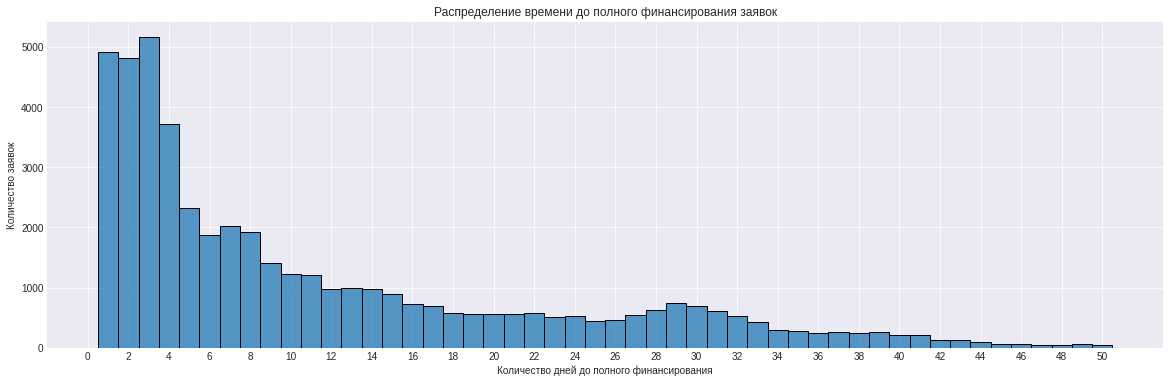

In [51]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.histplot(data=df_funding['days_to_full_funding'], ax=ax, discrete=True)
ax.set_title('Распределение времени до полного финансирования заявок')
ax.set_xlabel('Количество дней до полного финансирования')
ax.set_ylabel('Количество заявок')
ax.xaxis.set_ticks(np.arange(0, 51, 2))

plt.show()

Видим, что наибольшее число заявок финансируется за 6 дней. Также наблюдается небольшой подъем на сроке около месяц. Вероятно, на платформе Kiva есть механизмы для рекомендации заявок, которые не профинансировались за последние ~30 дней.

# 2.5.2 Взаимосвязь времени ожидания и суммы займов

                      loan_amount  term_in_months  days_to_full_funding
loan_amount              1.000000        0.160670              0.244865
term_in_months           0.160670        1.000000              0.173446
days_to_full_funding     0.244865        0.173446              1.000000


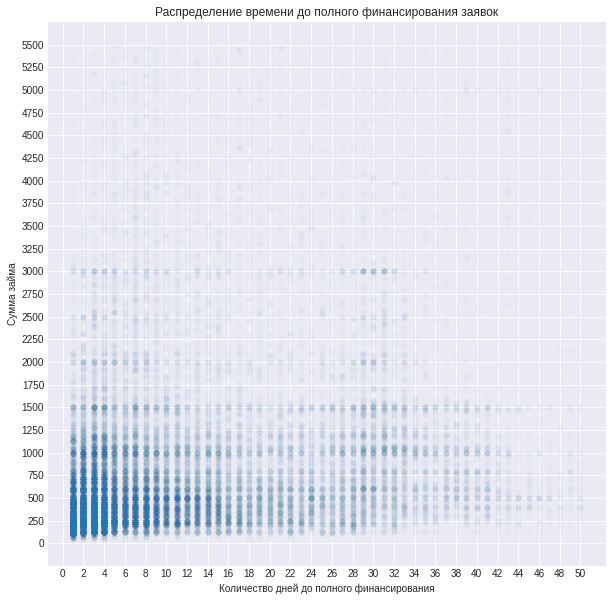

In [52]:
print(df_funding.corr())

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=df_funding, x='days_to_full_funding', y='loan_amount', ax=ax, alpha=0.01)
ax.set_title('Распределение времени до полного финансирования заявок')
ax.set_xlabel('Количество дней до полного финансирования')
ax.set_ylabel('Сумма займа')
ax.xaxis.set_ticks(np.arange(0, 51, 2))
ax.yaxis.set_ticks(np.arange(0, 5501, 250))

plt.show()

Корреляции между суммой займа и сроком финансирования нет. Ни коэффициент корреляции, ни точечный график не показывают явной зависимости.

Проглядывается, что суммы меньше 250 долларов реже финансируются более 14 дней.

Также, снова видно, что значимая часть заявок до 1500 долларов сосредоточена вокруг 30 дней – вероятно, можно сократить интервал напоминаний о заявках (если таковой есть) до двух недель и финансировать их быстрее.

# 2.5.3 Взаимосвязь времени ожидания и страны

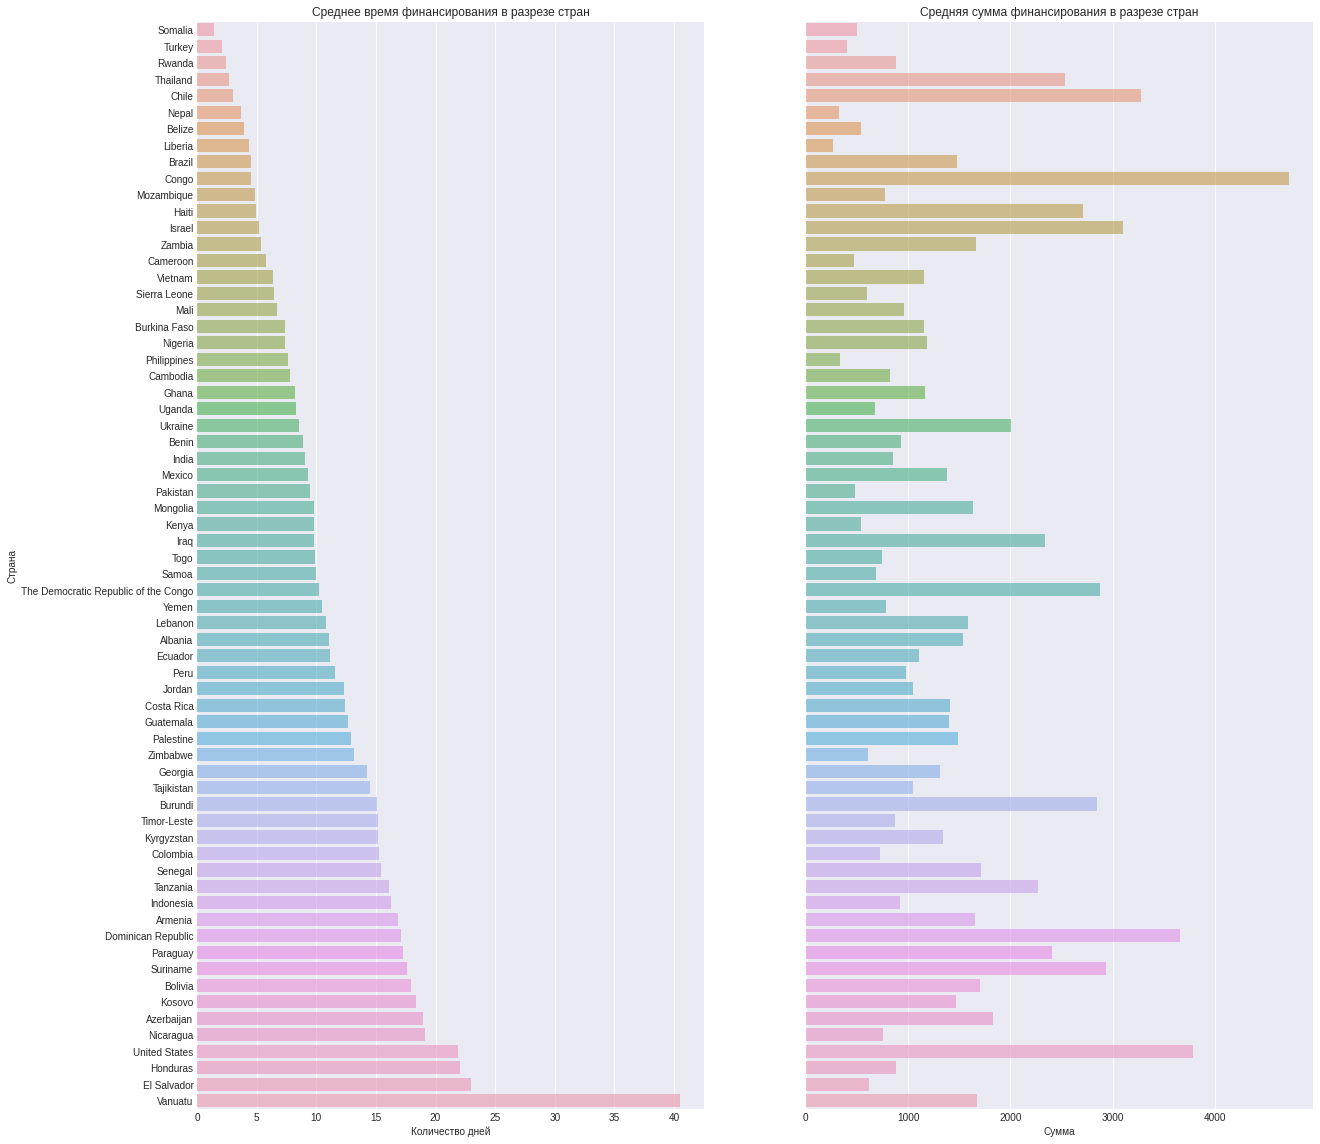

In [53]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 20), sharey=True)

df_funding_by_country_sorted = df_funding.groupby(['country']).mean().sort_values(['days_to_full_funding'])

sns.barplot(
    x=df_funding_by_country_sorted.days_to_full_funding,
    y=df_funding_by_country_sorted.index,
    ax=axs[0],
    alpha=0.6
)
axs[0].set_title('Среднее время финансирования в разрезе стран')
axs[0].set_xlabel('Количество дней')
axs[0].set_ylabel('Страна')

sns.barplot(
    x=df_funding_by_country_sorted.loan_amount,
    y=df_funding_by_country_sorted.index,
    ax=axs[1],
    alpha=0.6
)
axs[1].set_title('Средняя сумма финансирования в разрезе стран')
axs[1].set_xlabel('Сумма')
axs[1].set_ylabel('')

plt.show()

Если смотреть на распределение стран по времени финансирования и по суммам заявок, то явных зависимостей нет. В странах с бОльшими средними суммами могут в среднем быстрее финансироваться заявки и наоборот, в странах с небольшими суммами – медленно.

Это может свидетельствовать о различной степени известности платформы Kiva в разных странах, а также о различной степени внимания к определенным регионам.

# 2.5.4 Взаимосвязь времени ожидания и сектора экономики

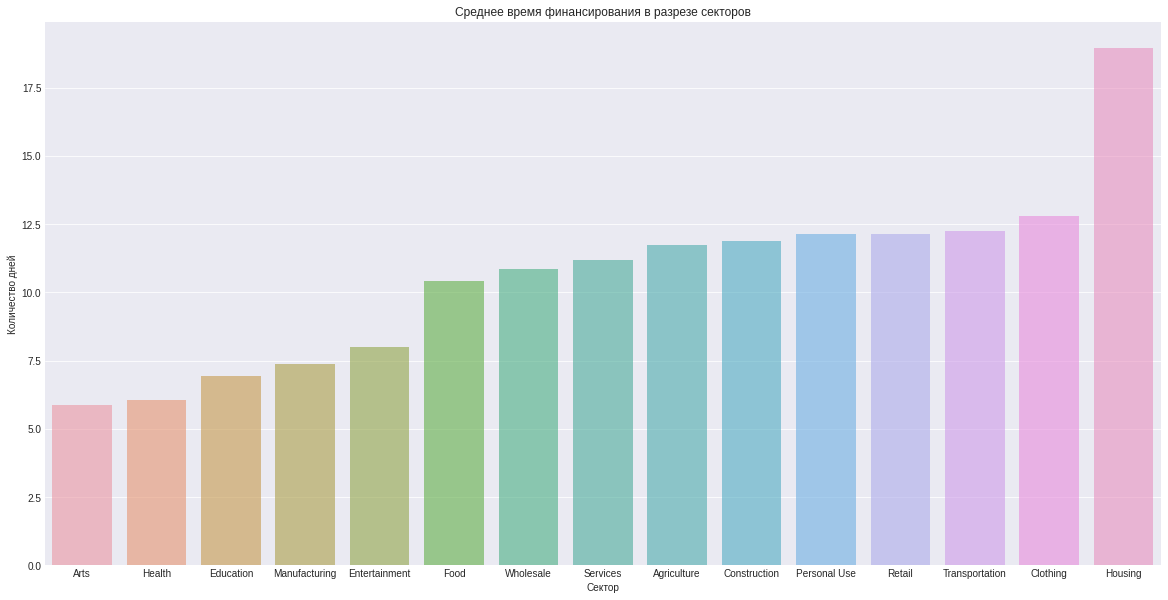

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))

df_funding_by_sector_sorted = df_funding.groupby(['sector']).mean().sort_values(['days_to_full_funding'])

sns.barplot(
    x=df_funding_by_sector_sorted.index,
    y=df_funding_by_sector_sorted.days_to_full_funding,
    ax=ax,
    alpha=0.6
)
ax.set_title('Среднее время финансирования в разрезе секторов')
ax.set_xlabel('Сектор')
ax.set_ylabel('Количество дней')

plt.show()

Учитывая распределение средних сумм займов по секторам, быстрее всего финансируются заявки с меньшими суммами займа, а также заявки на помощь с образованием, здравоохранением, производством и оптовыми секторами продаж.

Вероятно, эти сектора расцениваются как более перспективные, т. к. создаются рабочие места, появляются образованные/квалифицированные люди и новые способы заработка для них.

# 2.5.5 Время погашения кредита заёмщиком

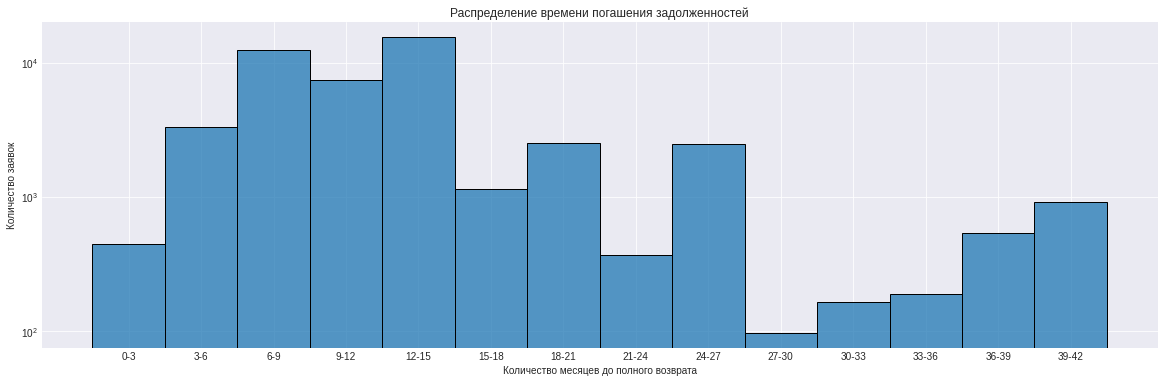

In [55]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.histplot(data=df_funding['term_in_months'], ax=ax, binwidth=3)
ax.set_title('Распределение времени погашения задолженностей')
ax.set_xlabel('Количество месяцев до полного возврата')
ax.set_ylabel('Количество заявок')
ax.set_yscale('log')

ticks_data = range(0, int(df_funding['term_in_months'].max() - 1), 3)
ax.xaxis.set_ticks([x + 2.5 for x in ticks_data])
ax.xaxis.set_ticklabels([f'{x}-{x+3}' for x in ticks_data])

plt.show()

Большая часть кредитов возвращается за 6-15 месяцев, что не дает нам полного понимания. Поэтому построим распределения по странам:

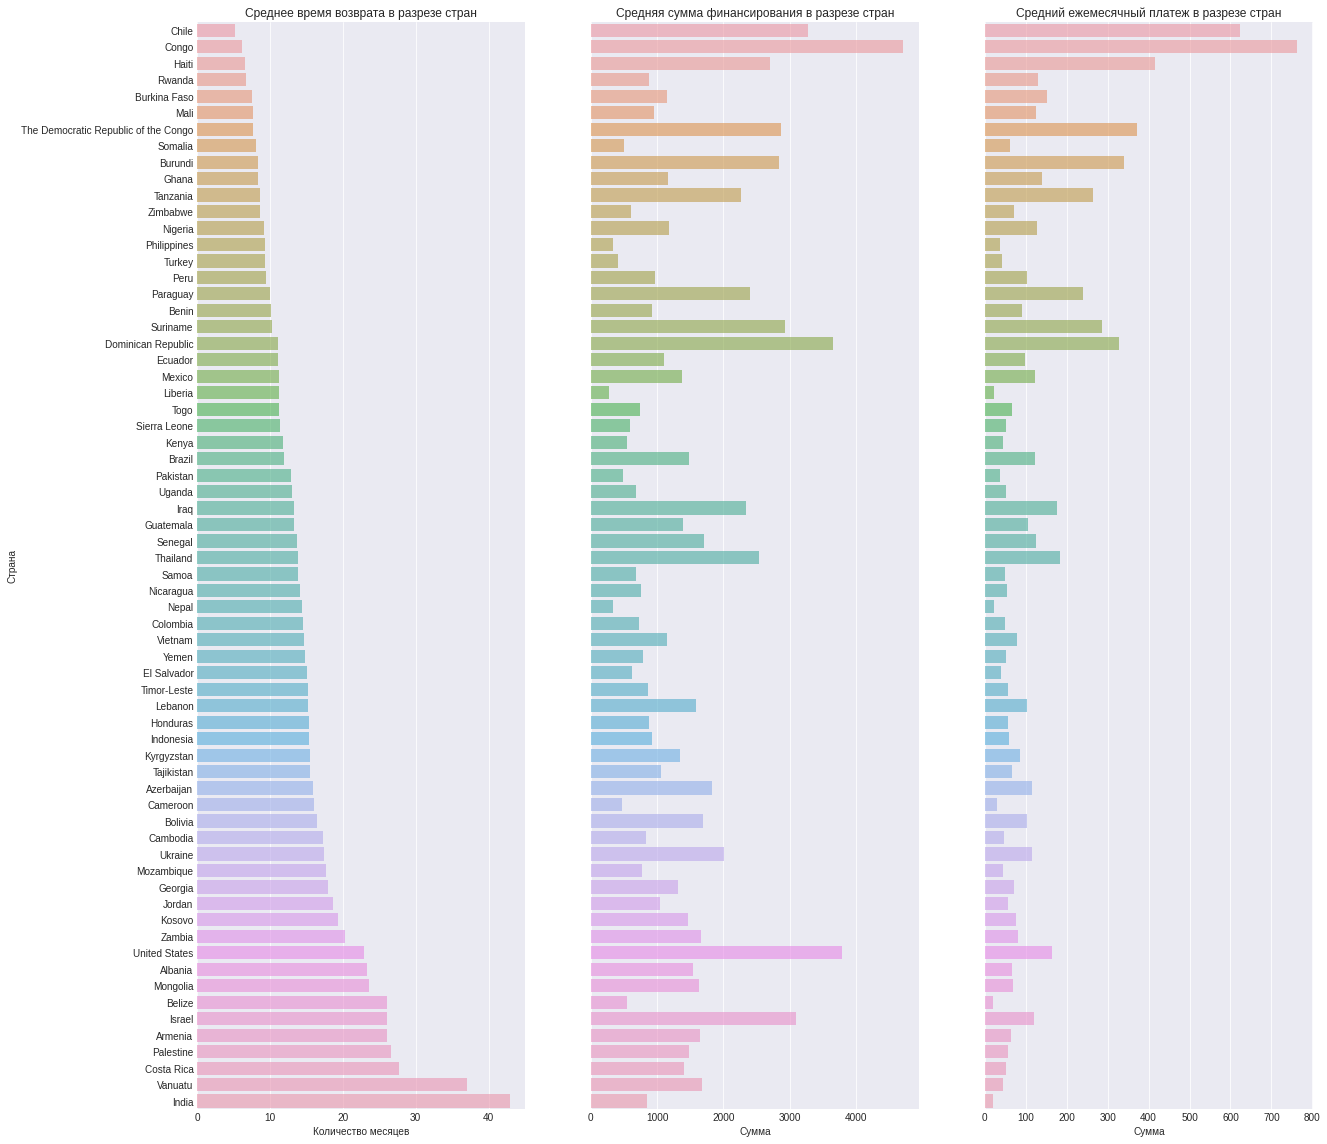

In [56]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 20), sharey=True)

df_funding_by_country_sorted = df_funding.groupby(['country']).mean().sort_values(['term_in_months'])
df_funding_by_country_sorted['monthly_payment'] = df_funding_by_country_sorted['loan_amount'] / df_funding_by_country_sorted['term_in_months']

sns.barplot(
    x=df_funding_by_country_sorted.term_in_months,
    y=df_funding_by_country_sorted.index,
    ax=axs[0],
    alpha=0.6
)
axs[0].set_title('Среднее время возврата в разрезе стран')
axs[0].set_xlabel('Количество месяцев')
axs[0].set_ylabel('Страна')

sns.barplot(
    x=df_funding_by_country_sorted.loan_amount,
    y=df_funding_by_country_sorted.index,
    ax=axs[1],
    alpha=0.6
)
axs[1].set_title('Средняя сумма финансирования в разрезе стран')
axs[1].set_xlabel('Сумма')
axs[1].set_ylabel('')

sns.barplot(
    x=df_funding_by_country_sorted.monthly_payment,
    y=df_funding_by_country_sorted.index,
    ax=axs[2],
    alpha=0.6
)
axs[2].set_title('Средний ежемесячный платеж в разрезе стран')
axs[2].set_xlabel('Сумма')
axs[2].set_ylabel('')

plt.show()

В результате получили распределение стран из которого можно выделить наиболее бедные страны, люди там могут позволить себе очень маленький ежемесячный платеж и наоборот страны, где люди готовы в короткий срок большими платежами закрывать кредиты.

В частности, заметно, что страны с самыми большими ежемесячными платежами совпадают с теми, где больше всего групповых заявок.

# Вывод по разделу

* Явной зависимости между суммой займа и сроком его финансирования нет.

* Зато есть зависимость от перспективности трат: траты на создание новых рабочих мест в легком производстве, образование, здоровье и оптовую торговлю финансируются гораздо быстрее, нежели займы на сложное строительство, не приносящее прибыли.

* Для улучшения времени финансирования заявок можно прибегнуть к более агрессивному продвижению заявок уже через 2 недели. Также, заметна разница между информированностью населения стран о возможности кредитовать/занимать на платформе Kiva и фокус на определенные регионы, которые широко известны как нуждающиеся. Kiva может потратить больше ресурсов на свою рекламу в некоторых регионах, а также информировать кредиторов о менее известных странах, где можно финансировать заявки. Это должно сделать распределение основных метрик более гладким между странами.